In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to fit the Perceptron model to the data
def fit_perceptron(X, y):
    # Initialize weights and bias as zeros
    w = np.zeros(X.shape[1])
    b = 0
    updates = 0
    # Loop over all data samples
    for i in range(y.shape[0]):
        # Predict the class label using the dot product of the feature vector and the weights and adding the bias
        y_pred = np.dot(X[i], w) + b
        # Check if the prediction is incorrect
        if np.sign(y_pred) != y[i]:
            # Update the weights and bias
            w += y[i] * X[i]
            b += y[i]
            updates += 1
    # Return the final weights, bias and number of updates
    return w, b, updates

# Function to predict class labels using the Perceptron model
def predict_perceptron(X, w, b):
    # Predict the class label using the dot product of the feature vector and the weights and adding the bias
    return np.sign(np.dot(X, w) + b)

In [3]:
# Function to plot the decision boundary of the Perceptron model
def plot_decision_boundary(X, y, predict):
    # Calculate the range of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Generate a grid of points over the range
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # Predict the class label for each point in the grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    # Get the sign of the predictions
    Z = np.sign(Z)
    # Reshape the predictions to match the shape of the grid
    Z = Z.reshape(xx.shape)
    # Plot the contours of the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    # Show the plot
    plt.show()

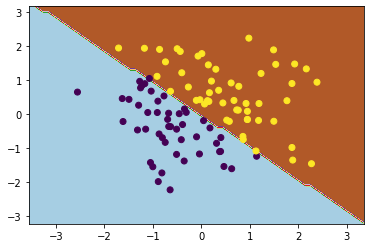

In [4]:
# Generate a random dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int) * 2 - 1

# Fit the Perceptron model to the data
w, b, updates = fit_perceptron(X, y)

# Define a function that predicts the class label using the learned weights and bias
predict = lambda X: np.sign(np.dot(X, w) + b)

# Plot the decision boundary
plot_decision_boundary(X, y, predict)

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#df_iris.head(5)

X = df_iris.drop('target', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#df_iris.head(5)

X = df_iris.drop('target', axis=1)

# Fit the Perceptron model to the data
w, b, updates = fit_perceptron(X, y)

# Define a function that predicts the class label using the learned weights and bias
predict = lambda X: np.sign(np.dot(X, w) + b)

# Plot the decision boundary
plot_decision_boundary(X, y, predict)

KeyError: 0